In [ ]:
import pandas as pd
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('covid.csv')
df.head()
df.shape

(566602, 23)

The data set contains 5,66,602 records, the data dictionary is provided as below:

    id: The identification number of the patient.

    sex: Identify gender of the patient, 1 as female and 2 as male.

    patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.

    entry_date: The date that the patient went to the hospital.

    date_symptoms: The date that the patient started to show symptoms.

    date_died: The date that the patient died, “9999-99-99” stands for recovered.

    intubed: Intubation is a procedure that’s used when you can’t breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). “1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.

    pneumonia: Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.

    age: Specifies the age of the patient.

    pregnancy: Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    diabetes: Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    asthma: Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    inmsupr: Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    hypertension: Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    other_disease: Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    obesity: Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    renal_chronic: Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    tobacco: Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.

    contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.

    icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.


# Date preprocessing
**Now we will convert the values in three categories i.e. 0,1 and 2**

We convert gender column name as here 

0: female , 1 : male

In [ ]:
gender = {2: 1, 1:0} #1 as female(0) , 2 as male(1)
df['sex']=df['sex'].replace([2,1],[1,0])
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert patient_type column name as here

0: not hospitalized , 1 : hospitalized


In [ ]:
type = {2: 1, 1:0} # 1 for not hospitalized(0) and 2 for hosptalized(1).
df['patient_type']=df['patient_type'].replace([2,1],[1,0])
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert date_died column name as here

0: patient recovered(not died) , 1 : patient died


In [ ]:
 #skip entry date and date symtoms
 # For date -died 9999-99-99 is patient recovered(0) and for others patient died(1)
df['date_died']=df['date_died'].apply(lambda x: 0 if x=='9999-99-99' else 1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert intubed column name as here

0: not used ventilator , 1 : used ventilator ,2: not specified


In [ ]:
#intubed : Intubation is a procedure that's used when you can't breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). "1" denotes that the patient used ventilator and "2" denotes that the patient did not, "97" "98" "99" means not specified.
#0 not used ventilator,1 used ventilator,2 not speciefied
df['intubed']=df['intubed'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert pneumonia column name as here

0: not pneumonia , 1 : pneumonia ,2: not specified


In [ ]:
#pneumonia: Indicates whether the patient already have air sacs inflammation or not "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not pnuemonia,1 pnuemonia,2 not speciefied
df['pneumonia']=df['pneumonia'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert pregnancy column name as here

0: not pregnant , 1 : pregnant ,2: not specified


In [ ]:

#pregenancy:Indicates whether the patient is pregnant or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not pregnant,1 pregnant,2 not speciefied
df['pregnancy']=df['pregnancy'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert diabetes column name as here

0: patient is not diabetic , 1 : patient is diabetic ,2: not specified


In [ ]:
#diabetes:Indicates whether the patient has diabetes or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not diabetic,1 diabetic,2 not speciefied
df['diabetes']=df['diabetes'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,2,2,2,1,2,1,2,2,2,99,1,2


We convert copd column name as here

0: patient is not copd , 1 : patient is copd ,2: not specified


In [ ]:
#copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not copd,1 copd,2 not speciefied
df['copd']=df['copd'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,2,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,2,2,1,2,1,2,2,2,99,1,2


We convert asthma column name as here

0: patient is not asthametic , 1 : patient is asthametic ,2: not specified


In [ ]:
#ashtma: Indiactes whether the patient has asthma or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not ashtma,1 asthma,2 not speciefied
df['asthma']=df['asthma'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,2,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,2,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,2,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,2,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,2,1,2,1,2,2,2,99,1,2


We convert inmsupr column name as here

0: patient is not immunosuppressed , 1 : patient is immunosuppressed ,2: not specified


In [ ]:
#inmsupr: Indicates whether the patient is immunosuppressed or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not ashtma,1 asthma,2 not speciefied
df['inmsupr']=df['inmsupr'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,2,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,2,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,2,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,2,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,2,1,2,2,2,99,1,2


We convert hypertension column name as here

0: patient has not hypertension , 1 : patient has hypertension ,2: not specified


In [ ]:
#hypertension: Indicates whether the patient has hypertension or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not hypertension,1 hypertension,2 not speciefied
df['hypertension']=df['hypertension'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,2,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,2,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,2,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,2,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,2,1,2,2,2,99,1,2


We convert other_disease column name as here

0: patient has not other_disease , 1 : patient has other_disease ,2: not specified


In [ ]:
#other_disease	: Indicates whether the patient has other disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not other_disease	,1 other_disease	,2 not speciefied
df['other_disease']=df['other_disease'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,2,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,2,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,2,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,2,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,2,2,2,99,1,2


We convert cardiovascular column name as here

0: patient has not cardiovascular , 1 : patient has cardiovascular ,2: not specified


In [ ]:
#cardiovascular	: Indicates whether the patient has cardivascular disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not cardiovascular	,1 cardiovascular	,2 not speciefied
df['cardiovascular']=df['cardiovascular'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,2,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,2,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,2,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,2,2,2,99,1,2


We convert obesity column name as here

0: patient has not obesity , 1 : patient has obesity ,2: not specified


In [ ]:
#obesity	: Indicates whether the patient has obesity disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not obesity	,1 obesity	,2 not speciefied
df['obesity']=df['obesity'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,0,2,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,0,2,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,2,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,0,2,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,0,2,2,99,1,2


We convert renal_chronic column name as here

0: patient has not renal_chronic , 1 : patient has renal_chronic ,2: not specified


In [ ]:
#renal_chronic :	: Indicates whether the patient has renal chronic disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not renal_chronic	,1 renal_chronic	,2 not speciefied
df['renal_chronic']=df['renal_chronic'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head() 

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,0,0,2,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,0,0,2,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,0,2,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,0,0,2,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,0,0,2,99,1,2


We convert tobacco column name as here

0: patient not consumed tobbaco , 1 : patient consumed tobbaco ,2: not specified


In [ ]:
#tobacco :	: Indicates whether the patient consumes tobbaco or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not tobacco	,1 tobacco	,2 not speciefied
df['tobacco']=df['tobacco'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head() 

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,0,0,0,2,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,0,0,0,99,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,99,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,0,0,0,99,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,0,0,0,99,1,2


We convert contact_other_covid column name as here

0: patient not contacted other covid person , 1 : patient contacted other covid person ,2: not specified


In [ ]:
#	contact_other_covid :	: Indicates whether the patient has came in cotact with other covid patient or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not 	contact_other_covid	,1 	contact_other_covid	,2 not speciefied
df['contact_other_covid']=df['contact_other_covid'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head() 

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,0,0,0,0,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,0,0,0,2,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,2,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,0,0,0,2,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,0,0,0,2,1,2


We convert covid_res column name as here

0: patient not covid_res , 1 : patient covid_res ,2: not specified


In [ ]:
#covid_res :	: Indicates whether the patient has covid_res or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not covid_res	,1 covid_res	,2 not speciefied
df['covid_res']=df['covid_res'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head() 

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,0,0,0,0,1,97
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,0,0,0,2,1,97
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,2,1,2
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,0,0,0,2,1,2
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,0,0,0,2,1,2


We convert icu column name as here

0: patient has not admitted icu, 1 :  has admitted icu ,2: not specified


In [ ]:
#icu :	: Indicates whether the patient admitted to icu or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.
#0 not icu	,1 icu	,2 not speciefied
df['icu']=df['icu'].apply(lambda x: 0 if x==2 else(1 if x==1 else 2))
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,27,2,0,0,0,0,0,0,0,0,0,0,0,1,2
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,24,2,0,0,0,0,0,0,0,0,0,0,2,1,2
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,2,1,0
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,30,2,0,0,0,0,0,0,0,0,0,0,2,1,0
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,60,0,1,0,0,0,1,0,1,0,0,0,2,1,0


In [ ]:
df.shape

(566602, 23)

For age we will find the mean ,

0: age less than mean
1: greater than or equal to mean

In [ ]:
df_mean = df['age'].mean()
print(df_mean)

42.62248280097847


In [ ]:
#age : Indicates patient's age
#0 not age<mean	,1>=mean
df['age']=df['age'].apply(lambda x: 0 if x<df_mean else 1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,2
1,1009bf,1,0,19-03-2020,17-03-2020,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,2
2,167386,0,1,06-04-2020,01-04-2020,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,1,0
3,0b5948,1,1,17-04-2020,10-04-2020,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0
4,0d01b5,0,1,13-04-2020,13-04-2020,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,2,1,0


**Discarding some columns**

Here some columns are not needed , so we will remove respective columns.
Columns discarded:discard ***pregnancy***, ***contact_other_covid***, ***covid_res***, ***icu***, ***intubed***,***drop id*** and ***date_symptoms***

In [ ]:
df = df.drop(df.columns[[0,3,4,6,9,19,20,21]], axis=1)
#In this project, author decided to discard ***pregnancy***, ***contact_other_covid***, ***covid_res***, ***icu*** and ***intubed***.

#Also can drop id,date_symptoms

In [ ]:
df.shape

(566602, 15)

**Download the new and clean datset**

In [ ]:
column_names=["sex","age","patient_type","pneumonia","diabetes","copd","asthma","inmsupr","hypertension" ,"other_disease","cardiovascular","obesity","renal_chronic","icu","date_died"]
df=df.reindex(columns=column_names)

df.to_csv('covid_clean.csv', index=False)

In [ ]:
from google.colab import files
files.download("covid_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,sex,age,patient_type,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,icu,date_died
0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0
2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


**Install pgmpy for making Bayesian models**

In [ ]:
pip install pgmpy

**Making Bayesian model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
# model = BayesianModel([('patient_type', 'renal_chronic'),('patient_type', 'inmsupr'),('patient_type', 'other_disease'),('patient_type', 'cardiovascular'), ('patient_type', 'hypertension'),('patient_type', 'asthma'), ('patient_type', 'copd'),('patient_type', 'icu'),
#                        ('icu', 'diabetes'),('icu', 'sex'),('icu', 'date_died'),('icu', 'pneumonia'),
#                        ('diabetes', 'hypertension'),('diabetes', 'renal_chronic'),('diabetes', 'copd'),('diabetes', 'date_died'),('diabetes', 'pneumonia'),
#                        ('hypertension', 'renal_chronic'),('hypertension', 'cardiovascular'),('hypertension', 'obesity'),('hypertension', 'date_died'),('hypertension', 'copd'),
#                        ('renal_chronic', 'inmsupr'),('renal_chronic', 'cardiovascular'),
#                        ('cardiovascular', 'other_disease'),('cardiovascular', 'obesity'),('cardiovascular', 'copd'),
#                        ('obesity', 'asthma'),
#                        ('asthma', 'inmsupr'),('asthma', 'sex'),
#                        ('inmsupr', 'other_disease'),
#                        ('other_disease', 'sex'),
#                        ('sex', 'date_died'),
#                        ('date_died', 'pneumonia'),])

model=BayesianModel([('diabetes','obesity'),('diabetes','date_died'),('diabetes','pneumonia'),('diabetes','age'),('diabetes','patient_type'),('diabetes','renal_chronic'),('diabetes','hypertension'),
                     ('hypertension','age'),('hypertension','copd'),('hypertension','patient_type'),('hypertension','cardiovascular'),('hypertension','renal_chronic'),
                     ('age','asthma'),('age','copd'),('age','pneumonia'),('age','obesity'),('age','inmsupr'),('age','cardiovascular'),('age','patient_type'),('age','renal_chronic'),
                     ('patient_type','copd'),('patient_type','icu'),('patient_type','other_disease'),('patient_type','cardiovascular'),('patient_type','inmsupr'),('patient_type','copd'),('patient_type','renal_chronic'),
                     ('renal_chronic','obesity'),('renal_chronic','cardiovascular'),('renal_chronic','inmsupr'),
                     ('obesity','asthma'),('obesity','icu'),
                     ('cardiovascular','copd'),('cardiovascular','other_disease'),
                     ('copd','asthma'),
                     ('icu','pneumonia'),('icu','date_died'),('icu','sex'),
                     ('asthma','sex'),('asthma','inmsupr'),
                     ('inmsupr','other_disease'),
                     ('pneumonia','date_died'),
                     ('date_died','sex'),
                     ('other_disease','sex')
                     ])
model.fit(df, estimator=MaximumLikelihoodEstimator)

Display model according to bayes net given by shiny bn

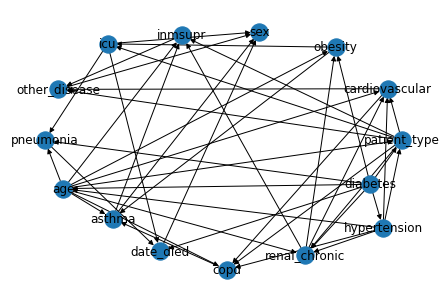

In [ ]:
nx.draw(model, with_labels=True)
plt.show()

In [ ]:
model.check_model()



True

In [ ]:
model.get_cpds()

[<TabularCPD representing P(age:2 | diabetes:3, hypertension:3) at 0x7f39374e57f0>,
 <TabularCPD representing P(asthma:3 | age:2, copd:3, obesity:3) at 0x7f38d609bf28>,
 <TabularCPD representing P(cardiovascular:3 | age:2, hypertension:3, patient_type:2, renal_chronic:3) at 0x7f38d60d58d0>,
 <TabularCPD representing P(copd:3 | age:2, cardiovascular:3, hypertension:3, patient_type:2) at 0x7f38d607d470>,
 <TabularCPD representing P(date_died:2 | diabetes:3, icu:3, pneumonia:3) at 0x7f38d60d5278>,
 <TabularCPD representing P(diabetes:3) at 0x7f38d607d438>,
 <TabularCPD representing P(hypertension:3 | diabetes:3) at 0x7f38d60acbe0>,
 <TabularCPD representing P(icu:3 | obesity:3, patient_type:2) at 0x7f38d60ac048>,
 <TabularCPD representing P(inmsupr:3 | age:2, asthma:3, patient_type:2, renal_chronic:3) at 0x7f38d60ac710>,
 <TabularCPD representing P(obesity:3 | age:2, diabetes:3, renal_chronic:3) at 0x7f38d60ac668>,
 <TabularCPD representing P(other_disease:3 | cardiovascular:3, inmsupr:3,

In [ ]:
print(model.get_cpds('date_died'))

+--------------+---------------------+---------------------+--------------+---------------------+---------------------+--------------+-----------------------+---------------------+--------------+---------------------+---------------------+--------------+---------------------+--------------------+--------------+----------------------+--------------------+--------------+--------------------+--------------------+--------------+--------------------+--------------+--------------+----------------------+---------------------+--------------+
| diabetes     | diabetes(0)         | diabetes(0)         | diabetes(0)  | diabetes(0)         | diabetes(0)         | diabetes(0)  | diabetes(0)           | diabetes(0)         | diabetes(0)  | diabetes(1)         | diabetes(1)         | diabetes(1)  | diabetes(1)         | diabetes(1)        | diabetes(1)  | diabetes(1)          | diabetes(1)        | diabetes(1)  | diabetes(2)        | diabetes(2)        | diabetes(2)  | diabetes(2)        | diabetes(2

# Deriving Inferences from Bayesian model

In [ ]:
from sklearn.linear_model import LogisticRegression

# prediction using linear model (sklearn)
# x is array consist of all variables other than date_died 
x=np.array(df.drop(columns=['date_died'],axis=1))
print(x.shape)

#y is array of date_died(Whether patient is dead or not)
y=np.array(df.date_died)
print(y.shape)
prediction_model = LogisticRegression(random_state=0).fit(x, y)



array([[0.09877378, 0.90122622]])

# Results

Query 1: What is the probability of patient to die due to corona,given that age grater than 42,has pneumonia, is a diabetic patient,is female and is admitted in icu? 

Here we take the values 1 for given,and 2 for not specified and 0 for not .

Means if we have to find probabilty of x given y,z,not w? We take values of y and z as 1 , w as 0, and a,b,c as 2 as it's not specified.

In [ ]:
# Query 1: What is the probability of patient to die due to corona,given that age grater than 42,has pneumonia, is a diabetic patient,is female and is admitted in icu? 

prediction_model.predict_proba([[1,1,1,1,1,2,2,2,2,2,2,2,2,1]])
# prediction_model.predict([[0,1,1,0,1,0,0,0,1,0,1,0,0,0]])

array([[0.28626856, 0.71373144]])


INTERPRETATION: Given this query 1, the probability of patient will die is **0.71373144**.

Means in this case , there are **71%** chances that patient will die.

------------------------------------------------------------------------
Query 2: What is the probability of patient to die due to corona,given that age grater than 42,has pneumonia, is a hypertension patient,is suffering from obesity and renal chronic?

Here we take the values 1 for given,and 2 for not specified and 0 for not .


In [ ]:
prediction_model.predict_proba([[2,1,0,1,2,2,2,2,1,2,2,1,1,2]])

array([[0.90378127, 0.09621873]])


INTERPRETATION: Given this query 2, the probability of patient will die is **0.09621873**.

Means in this case , there are **9.6%** chances that patient will die.So in **90%** cases patient will survive.

------------------------------------------------------------------------
Query 3: What is the probability of patient to die due to corona,given that age less than 42,is female, is a diabetic patient,is suffering from cardiovascular disease and admitted in ICU?

Here we take the values 1 for given,and 2 for not specified and 0 for not .


In [ ]:
prediction_model.predict_proba([[1,0,1,2,1,2,2,2,2,2,1,2,2,1]])

array([[0.32262684, 0.67737316]])


INTERPRETATION: Given this query 3, the probability of patient will die is **0.67737316**.

Means in this case , there are **67.74%** chances that patient will die.So in **32.26%** cases patient will survive.

------------------------------------------------------------------------
Query 4: What is the probability of patient to die due to corona,given that age less than 42,is female, is not a diabetic patient,is suffering from asthma,hypertension,Chronic obstructive pulmonary disease (COPD) and  and not admitted in ICU?

Here we take the values 1 for given,and 2 for not specified and 0 for not .


In [ ]:
prediction_model.predict_proba([[1,0,1,2,0,1,1,2,1,2,2,2,2,0]])

array([[0.48299209, 0.51700791]])


INTERPRETATION: Given this query 4, the probability of patient will die is **0.51700791**.

Means in this case , there are **51.7%** chances that patient will die.So in **48.3%** cases patient will survive.

------------------------------------------------------------------------
Query 5: What is the probability of patient to die due to corona,given that age less than 42,is male,is admitted to hospital, not suffering from pnuemonia, is not a diabetic patient,asthma,hypertension, but is suffering from obesity?

Here we take the values 1 for given,and 2 for not specified and 0 for not .


In [ ]:
prediction_model.predict_proba([[0,0,1,0,0,2,0,2,0,2,2,1,2,2]])

array([[0.80342325, 0.19657675]])


INTERPRETATION: Given this query 5, the probability of patient will die is **0.19657675**.

Means in this case , there are **19.66%** chances that patient will die.So in **80.34%** cases patient will survive.

# INFERENCE DERIVED
**INFERENCE 1**

The probability of patient to die due to corona,given that age greater than 42,has pneumonia, is a diabetic patient,is female and is admitted in icu is **0.71(71%)**


**INFERENCE 2**

The probability of patient to die due to corona,given that age grater than 42,has pneumonia, is a hypertension patient,is suffering from obesity and renal chronic is **0.091(9.1%)**.


**INFERENCE 3**

the probability of patient to die due to corona,given that age less than 42,is female, is a diabetic patient,is suffering from cardiovascular disease and admitted in ICU is **0.674(67.4%)**.

**INFERENCE 4**

The probability of patient to die due to corona,given that age less than 42,is female, is not a diabetic patient,is suffering from asthma,hypertension,Chronic obstructive pulmonary disease (COPD) and  and not admitted in ICU is **0.517(51.7%)**.


**INFERENCE 5**

the probability of patient to die due to corona,given that age less than 42,is male,is admitted to hospital, not suffering from pnuemonia, is not a diabetic patient,asthma,hypertension, but is suffering from obesity is **0.1966(19.66%)**.








# Dataset reference

https://www.kaggle.com/nghiale5991/covid-19-pre-existing-conditions-analysis